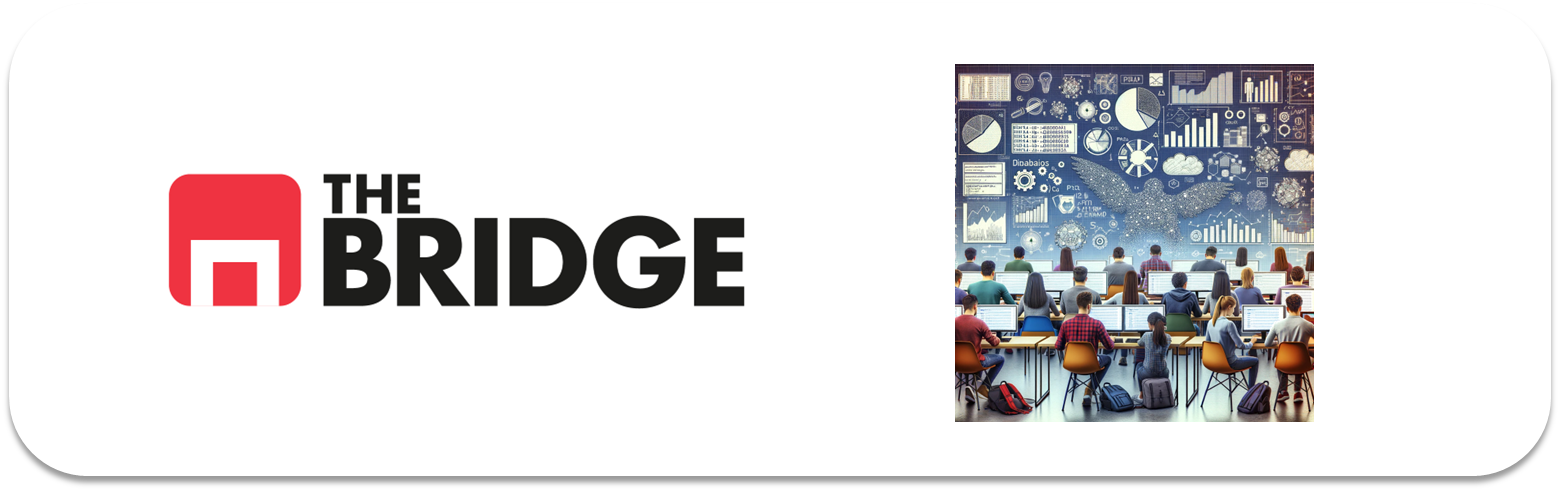

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

***

##### Instrucciones:  

1. Predecir precio medio de las casas: ***MEDV*** --> Target  

2. Modelo de regresión lineal  

3. Evaluación contra test (*MAE*, *RMSE*, *MSE*, *R2*)  

4. Comparar predicciones contra valores reales  

5. Regularización --> test de 3 valores diferentes de hiperparámetros (alpha/lambda y l1 ratio en el caso de Elastic net)  


##### **IMPORTANTE**  

1. X_train → features para aprender  

2. y_train → target para aprender  

3. X_test → features nuevas para evaluar  

4. y_test → target para comparar con las predicciones  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.copy_on_write = True

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

***

1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

In [2]:
df_inmo = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv")

In [3]:
df_inmo

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...
...,...
501,0.06263|0.0|11.93|0.0|0.573|6.593|69.1|2.4786|...
502,0.04527|0.0|11.93|0.0|0.573|6.12|76.7|2.2875|1...
503,0.06076|0.0|11.93|0.0|0.573|6.976|91.0|2.1675|...
504,0.10959|0.0|11.93|0.0|0.573|6.794|89.3|2.3889|...


In [4]:
df_inmo[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
          "TAX", "PTRATIO", "LSTAT", 
          "MEDV"]] = df_inmo["CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV"].str.split('|', n = 13, expand = True)

# He buscado en San Google para esto

In [5]:
df_inmo = df_inmo.drop("CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV", axis = 1)

In [6]:
df_inmo 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.12,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [7]:
df_inmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  LSTAT    506 non-null    object
 12  MEDV     506 non-null    object
dtypes: object(13)
memory usage: 51.5+ KB


In [8]:
df_inmo = df_inmo.apply(pd.to_numeric, errors = "coerce")

In [9]:
# Soraya me ha dado esta solución. Sale directamente en float y no hay que armar la que he liado arriba

# df_inmo = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep='|') 

In [10]:
df_inmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
df_inmo.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


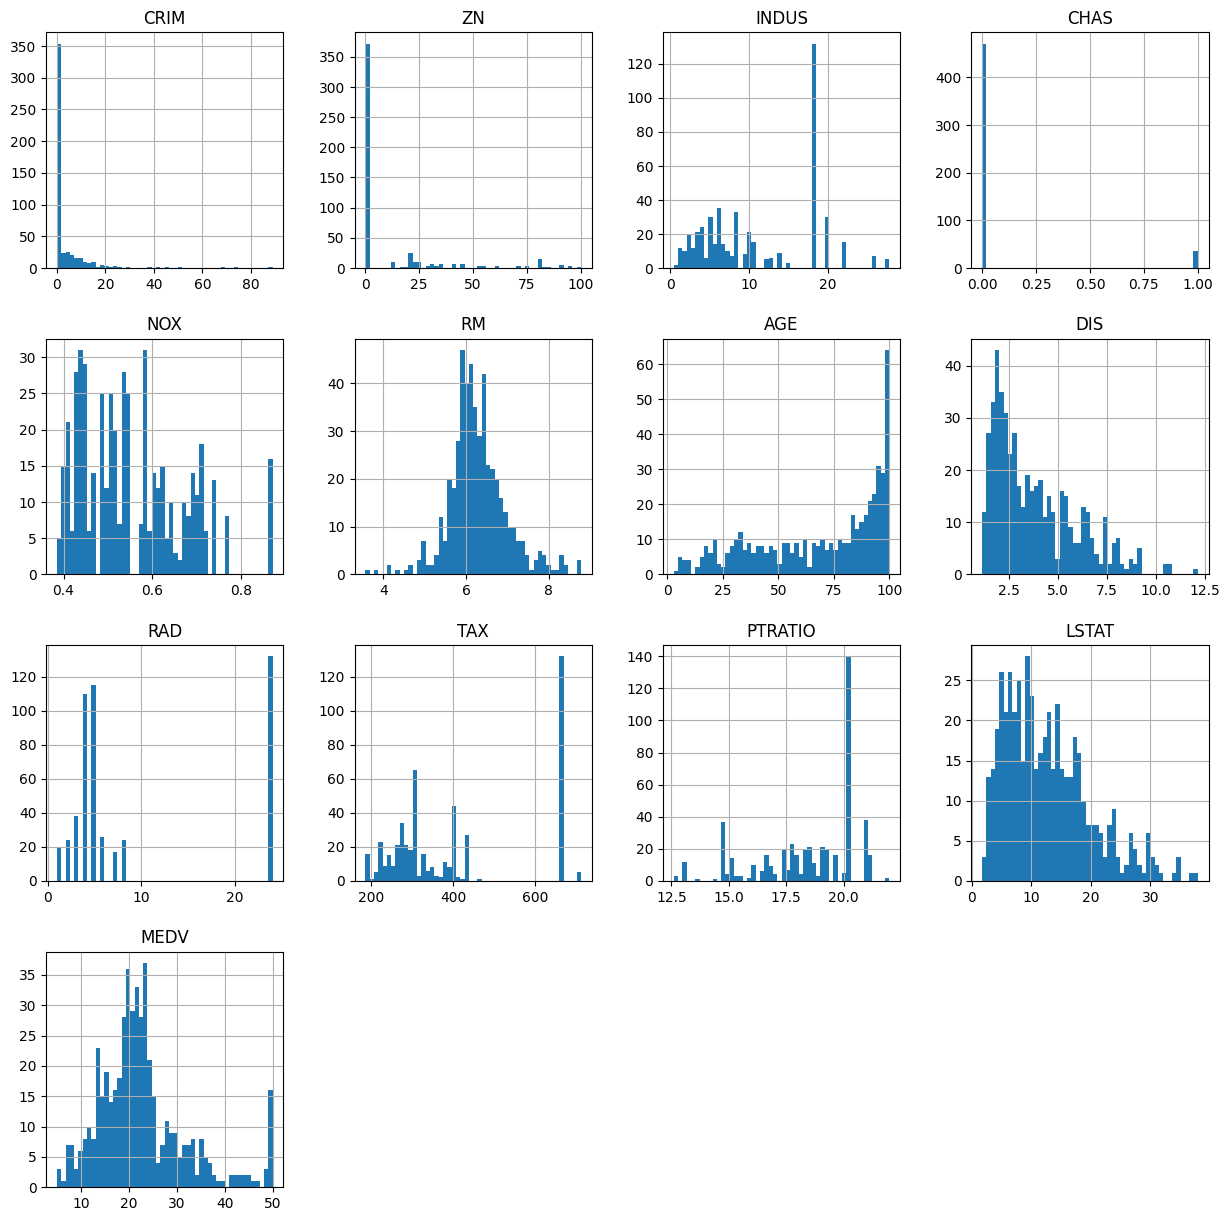

In [12]:
df_inmo.hist(bins=50, figsize=(15, 15)) 
plt.show()

***

2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

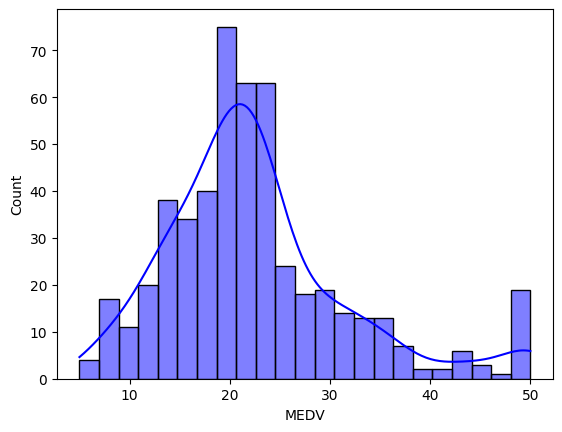

In [13]:
target = df_inmo["MEDV"]

sns.histplot(target, color='Blue', kde = True)
plt.show()

In [14]:
target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

##### Variable -> Númerica y continua  

##### Distribución

    - Valores concentrados a la derecha (alrededor de la media)
    - Media muy similar a mediana.
    - Desviación estándar baja (sin outliers)

##### Cumple condiciones para ser target

***

3. TRAIN | TEST

In [15]:
y = target.copy()
X = df_inmo.drop("MEDV", axis = 1)

train_set_X, test_set_X, train_set_y, test_set_y = train_test_split(X, y, test_size = 0.2, random_state=42)

***

4. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

In [16]:
X["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [17]:
X["RAD"].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: count, dtype: int64

##### FEATURES

- ***CRIM:*** Tasa de criminalidad per cápita por ciudad  

- ***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  

- ***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  

- ***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario) --> **Binaria = Categórica**

- ***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  

- ***RM:*** Número promedio de habitaciones por vivienda  

- ***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  

- ***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  

- ***RAD:*** Índice de accesibilidad a autopistas radiales  --> **Tipo de acceso a autopista = Categórica**

- ***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  

- ***PTRATIO:*** Relación alumno-maestro por ciudad  

- ***LSTAT:*** % de población de estatus socioeconómico bajo  

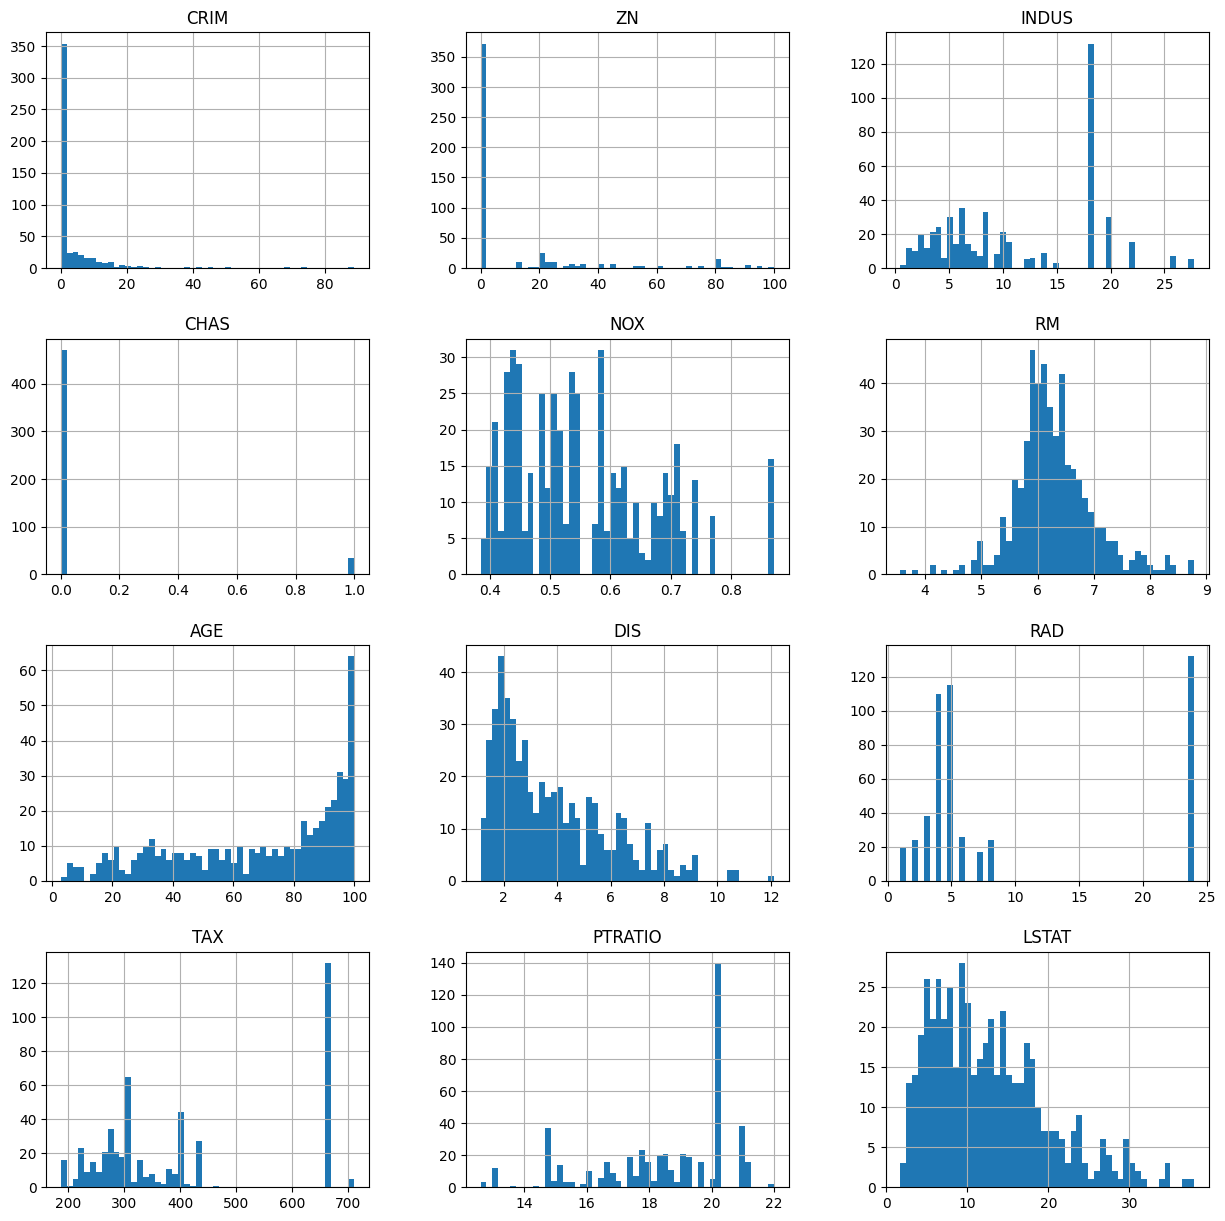

In [18]:
X.hist(bins=50, figsize=(15, 15)) 
plt.show()

In [19]:
# Correlaciones:

df_inmo.corr()["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [20]:
# Valores cercanos a -1 (anticorrelación) --> Paso a absolutos:

absolutas = np.abs(df_inmo.corr()["MEDV"].sort_values(key = np.abs, ascending=False))
absolutas

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

##### Relación fuerte (cerca de 1):
- LSTAT
- RM
- PTRATIO (no entiendo muy bien por qué. Qué importará a la hora de comprarse una casa cómo se lleve el niño con el profesor :| )

##### Relación media
- INDUS (igual que la de arriba)
- TAX
- NOX 

##### Relación más bien baja
- CRIM --> Vista la distribución de la variable... yo la quitaría
- AGE --> Años de las casas
- ZN --> Vista la distribución de la variable... yo la quitaría
- DIS --> Distancia a centros de empleo 

- RAD (**categórica**)
- CHAS (**categórica**)


***

5. Trata las variables para que funcionen lo mejor posible en el modelo.

In [21]:
# Separo variables entre categóricas y numéricas:

categoricas = absolutas[["RAD", "CHAS"]].index.to_list()
categoricas


['RAD', 'CHAS']

In [22]:
# Quito también la variable cuya correlación es < 0.37 --> ZN

numericas = absolutas.drop(["RAD", "CHAS", "MEDV", "ZN"]).index.to_list()
numericas

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'DIS']

In [23]:
correlacion_numericas = train_set_X[numericas].corr(numeric_only = True)
correlacion_numericas

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM,AGE,DIS
LSTAT,1.000000,-0.612577,0.360167,0.603644,0.530632,0.593862,0.414142,0.571051,-0.494921
RM,-0.612577,1.000000,-0.342643,-0.398690,-0.281127,-0.299615,-0.200303,-0.210863,0.198299
PTRATIO,0.360167,-0.342643,1.000000,0.348303,0.444836,0.161253,0.288970,0.240841,-0.217588
INDUS,0.603644,-0.398690,0.348303,1.000000,0.702353,0.770957,0.400198,0.636569,-0.707566
TAX,0.530632,-0.281127,0.444836,0.702353,1.000000,0.650247,0.576894,0.471670,-0.523577
NOX,0.593862,-0.299615,0.161253,0.770957,0.650247,1.000000,0.396406,0.720417,-0.772330
CRIM,0.414142,-0.200303,0.288970,0.400198,0.576894,0.396406,1.000000,0.334090,-0.366487
AGE,0.571051,-0.210863,0.240841,0.636569,0.471670,0.720417,0.334090,1.000000,-0.756589
DIS,-0.494921,0.198299,-0.217588,-0.707566,-0.523577,-0.772330,-0.366487,-0.756589,1.000000


In [24]:
umbral_col = 0.7

variables_no = []

correlacion = train_set_X[numericas].corr()

for columna in numericas:
    if columna not in variables_no:
        for columna_2 in numericas:
            if columna != columna_2 and columna_2 not in variables_no:
                if abs(correlacion.loc[columna, columna_2]) >= umbral_col:
                    variables_no.append(columna_2)

print(variables_no)

['TAX', 'NOX', 'DIS']


In [25]:
for no in variables_no:
    numericas.remove(no)

In [26]:
numericas

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE']

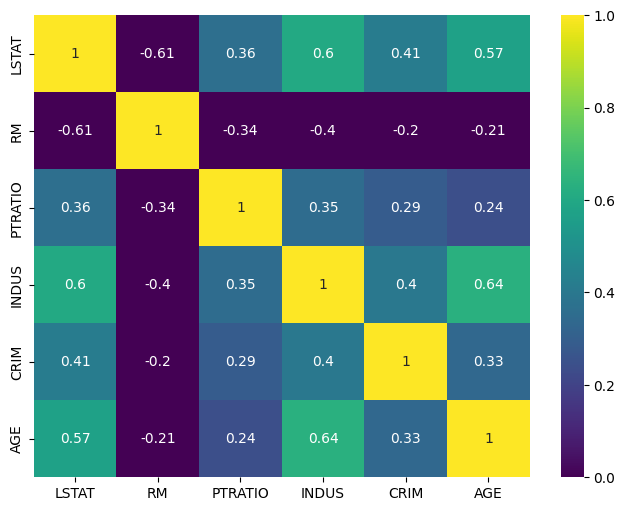

In [27]:
plt.figure(figsize = (8,6))
sns.heatmap(train_set_X[numericas].corr(numeric_only = True), annot = True, cmap = "viridis", vmin=0, vmax=1);

##### Variables numéricas:
- Valores de correlación bajos --> Independencia entre las variables

In [28]:
categoricas

['RAD', 'CHAS']

In [29]:
train_set_X["CHAS"].value_counts()

CHAS
0.0    375
1.0     29
Name: count, dtype: int64

<Axes: xlabel='MEDV', ylabel='Count'>

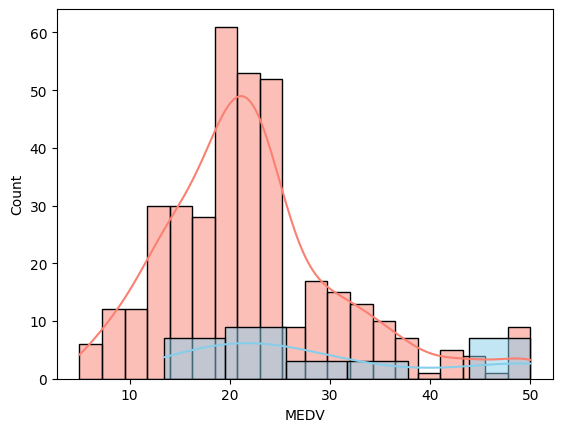

In [30]:
sns.histplot(
    x=train_set_y[train_set_X.CHAS == 0],
    kde=True,
    color="salmon"
)

sns.histplot(
    x=train_set_y[train_set_X.CHAS == 1],
    kde=True,
    color="skyblue"
)

- Se observa que el precio medio de las casas es más barato, cuanto más lejos estén del río (son las más abundantes, posible relación con nivel €).  

-  El precio de las casas aumenta conforme se encuentran más cerca del río

In [31]:
train_set_X["RAD"].value_counts()

RAD
24.0    101
5.0      94
4.0      80
3.0      32
6.0      23
8.0      21
2.0      21
1.0      17
7.0      15
Name: count, dtype: int64

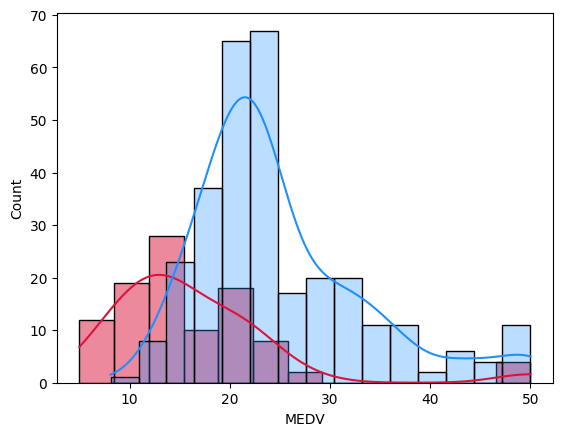

In [32]:
# Los índices siguen orden del 1 - 8... pero luego aparece un 24 (valor raro)

sns.histplot(
    x=train_set_y[train_set_X.RAD == 24],
    kde=True,
    color="crimson"
)

sns.histplot(
    x=train_set_y[train_set_X.RAD != 24],
    kde=True,
    color="dodgerblue",
    alpha = 0.3
);


- Las casas son más baratas de media cuando la incorporación a la autopista es el índice 24, salvo outlier.  

- El precio medio de las casas aumenta cuando la incorporación a la autopista es un índice diferente a 24.  

- En cuanto a la distribución de los precios de las casas cuando el índice es diferente a 24, las viviendas de precio alrededor de la media de los valores son las más numerosas, encontrándose viviendas en todos los rangos de precios medios elevados. En el caso contrario, las viviendas se encuentran desplazadas hacia los precios más baratos, con menor número de viviendas que en el primer caso.

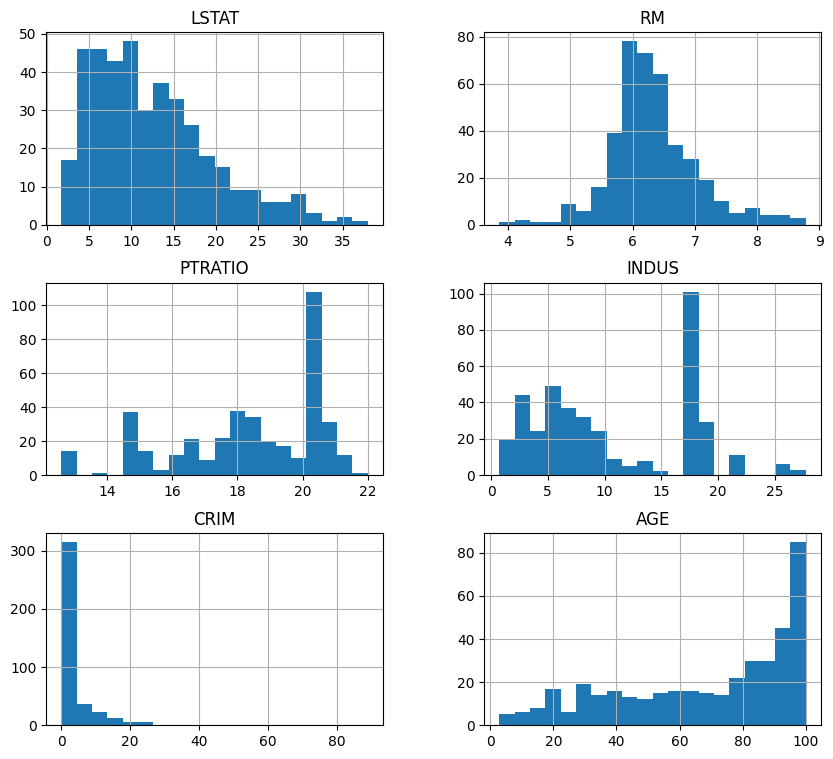

In [33]:
# Ver qué variables hay que transformar:
train_set_X[numericas].hist(bins=20, figsize=(10, 9)) 
plt.show()

- LSTAT --> Larga cola, paso a log  

- RM --> Distrubución """casi""" normal, no toco  

- PTRATIO, INDUS, AGE --> No presentan aspecto de necesitar modificación  

- CRIM --> Larga cola, paso a log

In [34]:
train_bck = train_set_X.copy()

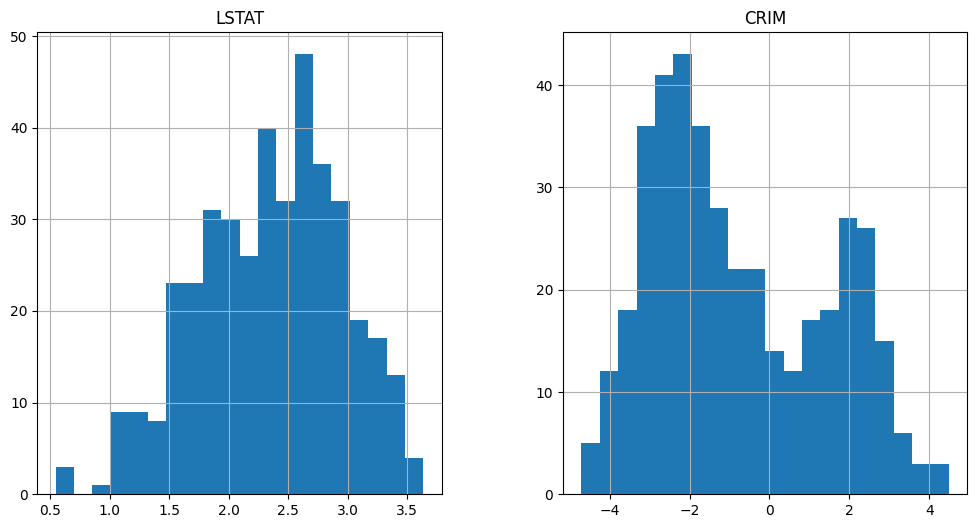

In [35]:
# Transformación de LSTAT Y CRIM

a_transformar = ["LSTAT", "CRIM"]

for variable in a_transformar:
    train_set_X[variable] = train_set_X[variable].apply(np.log)

train_set_X[a_transformar].hist(bins=20, figsize=(12, 6)) 
plt.show()

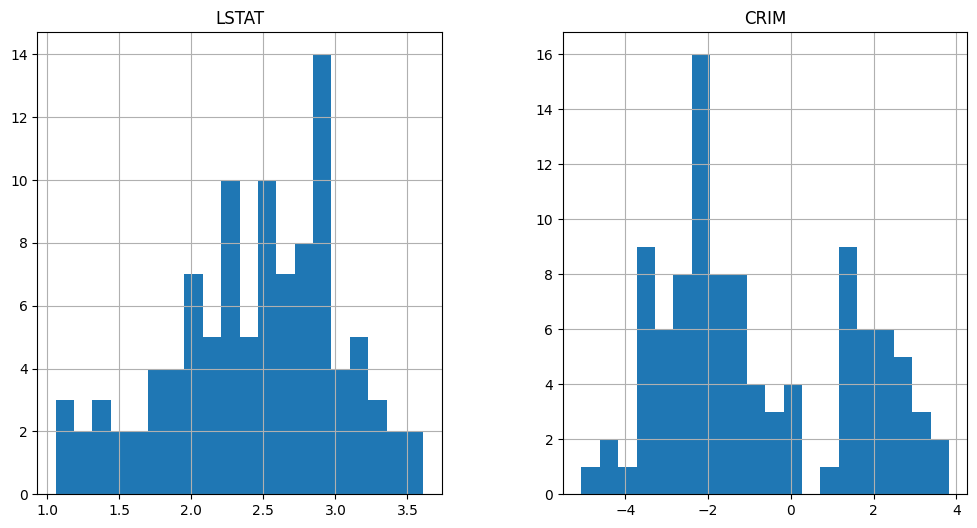

In [36]:
# Aplicar cambios a test:

a_transformar = ["LSTAT", "CRIM"]

for variable in a_transformar:
    test_set_X[variable] = test_set_X[variable].apply(np.log)

test_set_X[a_transformar].hist(bins=20, figsize=(12, 6)) 
plt.show()

In [37]:
# Escalado:

from sklearn.preprocessing import MinMaxScaler

features_num = ["LSTAT","RM","PTRATIO","INDUS", "AGE", "CRIM"]
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(train_set_X[features_num]), columns= features_num)
resultado_min_max

,LSTAT,RM,PTRATIO,INDUS,AGE,CRIM
0,0.727050,-0.413870,0.617021,0.285926,0.944387,0.612987
1,0.028538,-0.198292,0.787234,-0.451852,0.104016,-0.077985
2,-0.022337,-0.118161,-0.085106,-0.605926,-0.579815,-0.708077
3,0.683507,-0.088875,0.617021,0.285926,0.693100,0.448387
4,0.214054,-0.241814,0.787234,-0.451852,0.371782,-0.046283
...,...,...,...,...,...,...
399,0.539988,-0.197478,0.765957,-0.420741,0.833162,-0.360557
400,0.305950,-0.189343,0.276596,-0.539259,-0.192585,-0.239118
401,-0.195791,0.127517,-0.063830,-0.905926,-0.447992,-0.890158
402,0.682951,0.125076,0.617021,0.285926,0.888774,0.548316


In [38]:
# Estandarización:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_set_X[numericas])

# resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set_X[numericas]),columns = numericas)
# resultado_standardization.head()

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [39]:
# Con esto cambiado, aplicar transformación a train y test:

train_set_X[numericas] = scaler.transform(train_set_X[numericas])
test_set_X[numericas] = scaler.transform(test_set_X[numericas])

In [40]:
train_set_X[numericas].describe()

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,1.648846e-18,-2.616169e-16,8.519038e-16,-4.177077e-17,-3.297692e-18,-4.858600e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-3.000707e+00,-3.461733e+00,-2.568944e+00,-1.487791e+00,-1.831385e+00,-2.348206e+00
25%,-7.325080e-01,-6.003488e-01,-6.821011e-01,-8.502733e-01,-8.075264e-01,-8.228264e-01
50%,6.221804e-02,-1.494427e-01,1.714705e-01,-3.521669e-01,-2.637886e-01,3.270201e-01
75%,7.345853e-01,4.528240e-01,8.453428e-01,1.033237e+00,9.044722e-01,8.974727e-01
max,2.132647e+00,3.477564e+00,1.653990e+00,2.433163e+00,2.454541e+00,1.124581e+00


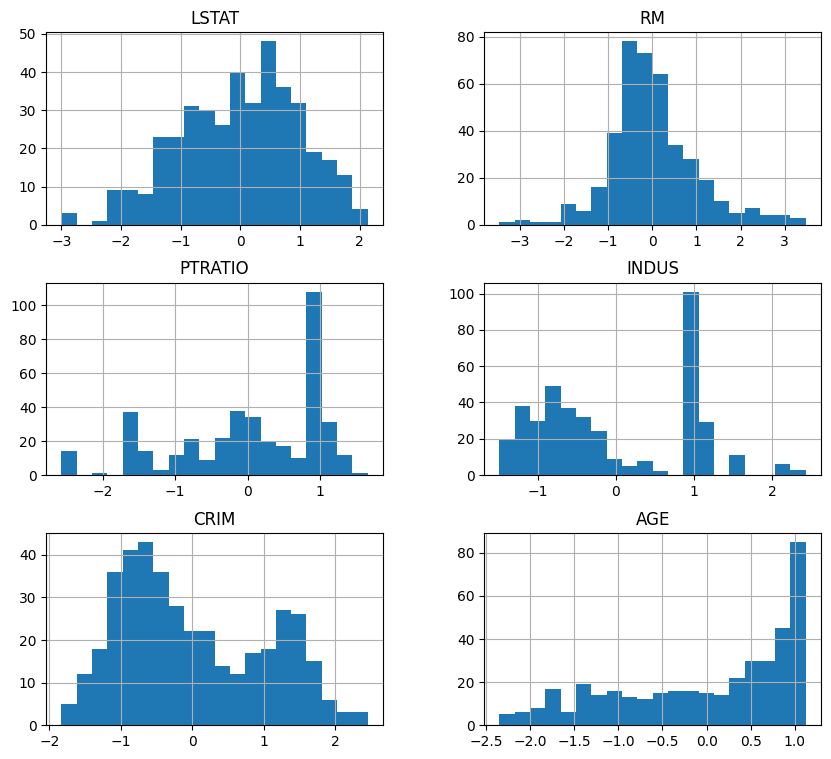

In [41]:
train_set_X[numericas].hist(bins=20, figsize=(10, 9)) 
plt.show()

In [42]:
train_set_X = train_set_X[numericas]
train_set_X

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
477,1.432072,-1.428069,0.845343,1.033237,1.625187,1.028015
15,-0.360783,-0.680087,1.204741,-0.413160,0.144459,-0.431199
332,-0.491363,-0.402063,-0.637176,-0.715218,-1.205804,-1.618599
423,1.320311,-0.300450,0.845343,1.033237,1.272456,0.591681
19,0.115378,-0.831094,1.204741,-0.413160,0.212396,0.033747
...,...,...,...,...,...,...
106,0.951944,-0.677264,1.159817,-0.352167,-0.461081,0.834884
270,0.351245,-0.649038,0.126546,-0.584520,-0.200844,-0.946216
348,-0.936562,0.450354,-0.592251,-1.303361,-1.595998,-1.389703
435,1.318883,0.441886,0.845343,1.033237,1.486599,0.931450


In [43]:
test_set_X = test_set_X[numericas]
test_set_X

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
173,-0.252540,0.141282,-0.771951,-1.007111,-0.751762,0.555916
274,-1.815413,0.623942,-0.322703,-0.664391,-0.978462,-1.275254
491,0.898545,-0.469805,0.800418,2.433163,-0.685745,1.081663
72,-1.072370,-0.354079,0.396095,-0.025421,-0.752474,-2.172957
452,0.823287,-0.026661,0.845343,1.033237,1.120561,0.831307
...,...,...,...,...,...,...
412,1.967092,-2.382098,0.845343,1.033237,1.730016,1.124581
436,0.896705,0.204790,0.845343,1.033237,1.606100,0.884955
411,1.165613,0.481403,0.845343,1.033237,1.593977,1.124581
86,0.333250,-0.424644,0.081621,-0.943214,-1.017742,-0.838921


***

6. Construye un modelo de regresión lineal.

In [44]:
from sklearn.linear_model import LinearRegression

lineal_r = LinearRegression()

# Arboles de decisión para Regresión 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42) # Apuntes Jaime, no entiendo muy bien para qué se hace esto
tree_reg.fit(train_set_X, train_set_y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

In [45]:
# Entrenamiento:
lineal_r.fit(train_set_X, train_set_y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


***

7. Analiza si lo crees conveniente los pesos y la importancia de las features.

In [46]:
# w0 = Nivel base del target antes de estar influenciado por features
lineal_r.intercept_

np.float64(22.796534653465347)

In [47]:
# Coeficientes (pesos)
lineal_r.coef_

array([-6.06319304,  2.1890045 , -1.65006693, -0.09261528, -0.1384832 ,
        1.28523142])

In [48]:
coef_df = pd.DataFrame(lineal_r.coef_, train_set_X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
LSTAT,-6.063193
RM,2.189005
PTRATIO,-1.650067
INDUS,-0.092615
CRIM,-0.138483
AGE,1.285231


##### Modelo:

$MEDV =	-0.6063193 \times \text{LSTAT} + 2.189005 \times \text{RM} + -1.650067  \times \text{PTRATIO} + -0.092615 \times \text{INDUS} + -0.138483 \times \text{CRIM} + 1.285231 \times\text{AGE}$

***

8. Evalúa tu modelo. Haz un pequeño assesment de su generabilidad. Compara gráficamente las predicciones con los valores reales.

In [49]:
# train_error:

# Primero las predicciones
train_pred_lin = lineal_r.predict(train_set_X)
test_pred_lin = lineal_r.predict(test_set_X)

train_pred_tree = tree_reg.predict(train_set_X)

In [50]:
from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

In [51]:
MAE = median_absolute_error(train_set_y, train_pred_lin)
RMSE = root_mean_squared_error(train_set_y, train_pred_lin)
R2 = lineal_r.score(train_set_X, train_set_y)

print(MAE)
print(RMSE)
print(R2)

2.8291681046194785
4.681102360491989
0.7477626253538077


In [52]:
# test error
MAE_test = median_absolute_error(test_set_y, test_pred_lin)
RMSE_test = root_mean_squared_error(test_set_y, test_pred_lin)
R2_test = lineal_r.score(test_set_X, test_set_y)

print(MAE_test)
print(RMSE_test)
print(R2_test)

1.8363735930314338
4.539375667774288
0.719011749221605


- train y test son muy similares en valores. RMSE bajo indica predicción... es mejor en test.
- Creo que está bien

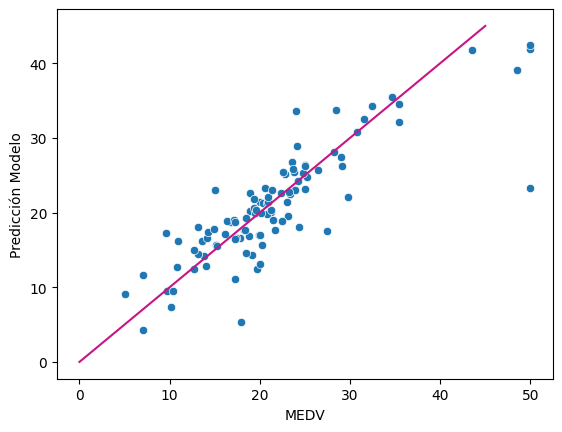

In [56]:
sns.scatterplot(x=test_set_y,y=test_pred_lin);
plt.plot([0,45],[0,45],'mediumvioletred')
plt.ylabel("Predicción Modelo")
plt.show()

***

9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

##### Ridge:  

- Reduce coeficientes grandes, pero no los lleva a 0
- Penaliza la suma de los cuadrados de los coeficientes
- Cuando hay multicolinealidad o muchas variables correlacionadas

##### El modelo no cumple --> No uso Ridge

***

##### Ridge:  

- Reduce coeficientes grandes, pero no los lleva a 0
- Penaliza la suma de los **cuadrados** de los coeficientes
- Cuando hay multicolinealidad o muchas variables correlacionadas

***

##### Lasso (L1):

- Reduce algunos coeficientes a exactamente 0
- Penaliza la suma de los **valores absolutos** de los coeficientes
- Selección automática de variables. Elimina variables irrelevantes

##### Como no hay multicolinealidad entre las variables, creo que esta es la opción que más encaja para regularizar el modelo

***

##### Elastic Net (L1 + L2):

- Combinación Ridge y Lasso
- Mezcla **penalización** L1 y L2 con dos hiperparámetros
- Muchas variables correlacionadas; selección de variables

***

In [62]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [87]:
# Ridge

ridgeR = Ridge(alpha = 10) 
ridgeR.fit(train_set_X, train_set_y)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(train_set_y, lineal_r.predict(train_set_X)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(test_set_y, lineal_r.predict(test_set_X)),2))
print()
print("TRAIN:")
print("MAE:", median_absolute_error(train_set_y, train_pred_lin))
print("MSE:", round(metrics.mean_squared_error(train_set_y, ridgeR.predict(train_set_X)),2))
print("RMSE:", root_mean_squared_error(train_set_y, ridgeR.predict(train_set_X)))
print("R^2:", ridgeR.score(train_set_X, train_set_y))
print()
print("TEST:")
print("MAE:", median_absolute_error(test_set_y, test_pred_lin))
print("MSE:", metrics.mean_squared_error(test_set_y, ridgeR.predict(test_set_X)))
print("RMSE:", np.sqrt(metrics.root_mean_squared_error(test_set_y, ridgeR.predict(test_set_X))))
print("R^2:", ridgeR.score(test_set_X, test_set_y))

Train MSE sin regularización: 21.91
Test MSE sin regularización: 20.61

TRAIN:
MAE: 2.8291681046194785
MSE: 21.96
RMSE: 4.686130802465639
R^2: 0.7472204273238542

TEST:
MAE: 1.8363735930314338
MSE: 20.766203152342694
RMSE: 2.1347119172226265
R^2: 0.7168262394571485


- Mejor R^2 en test
- Regulariza sin eliminar variables
- Muy estable

In [90]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(train_set_X, train_set_y)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(train_set_y, lineal_r.predict(train_set_X)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(test_set_y, lineal_r.predict(test_set_X)),2))
print()
print("Train MSE: %0.4f" % metrics.mean_squared_error(train_set_y, lassoR.predict(train_set_X)))
print("RMSE:", root_mean_squared_error(train_set_y, lassoR.predict(train_set_X)))
print("R^2:", lassoR.score(train_set_X, train_set_y))
print()
print("TEST:")
print("Test MSE: %0.4f" % metrics.mean_squared_error(test_set_y, lassoR.predict(test_set_X)))
print("RMSE:", root_mean_squared_error(test_set_y, lassoR.predict(test_set_X)))
print("R^2:", lassoR.score(test_set_X, test_set_y))

Train MSE sin regularización: 21.91
Test MSE sin regularización: 20.61

Train MSE: 21.9840
RMSE: 4.688711238022165
R^2: 0.7469419626307405

TEST:
Test MSE: 20.6223
RMSE: 4.541176097556298
R^2: 0.7187888111004441


- R^2 mejor que Ridge
- Elimina variables irrelevantes

In [89]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
elastic_net.fit(train_set_X, train_set_y)

print("TRAIN:")
print("Train MSE: %0.4f" % metrics.mean_squared_error(train_set_y, elastic_net.predict(train_set_X)))
print("RMSE:", root_mean_squared_error(train_set_y, elastic_net.predict(train_set_X)))
print("R^2:", elastic_net.score(train_set_X, train_set_y))
print()
print("Test MSE: %0.4f" % metrics.mean_squared_error(test_set_y, elastic_net.predict(test_set_X)))
print("RMSE:", root_mean_squared_error(test_set_y, elastic_net.predict(test_set_X)))
print("R^2:", elastic_net.score(test_set_X, test_set_y))

TRAIN:
Train MSE: 24.5574
RMSE: 4.955539633218964
R^2: 0.7173200085077418

Test MSE: 22.4087
RMSE: 4.733783461619254
R^2: 0.6944286126285091


- R^2 peor que modelos anteriores

***

10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías? ¿Por qué?

La mejor opción de modelo (según lo que interpreto de los datos) es Lasso porque según R^2, se ajusta mejor a los datos. So hay overfitting porque train y test son similares